start capture ...


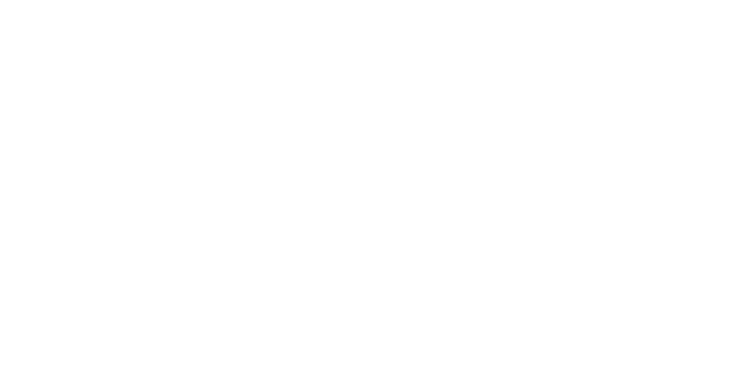

finish capture.


In [4]:
# 0215.py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
class Video(animation.FuncAnimation):
    def __init__(self, device=0, fig=None, frames=None,
                       interval=80, repeat_delay=5, blit=False, **kwargs):
        if fig is None:
            self.fig, self.ax = plt.subplots(1, 2, figsize=(10,5))
            self.fig.canvas.set_window_title('Video Capture')
            self.ax[0].set_position([0, 0, 0.5, 1])
            self.ax[0].axis('off')

            self.ax[1].set_position([0.5, 0, 0.5, 1])
            self.ax[1].axis('off')
##            plt.subplots_adjust(left=0,bottom=0,right=1,top=1,
##                                wspace=0.05,hspace=0.05)
            
        super(Video, self).__init__(self.fig, self.updateFrame, init_func=self.init,
                                   frames=frames, interval=interval, blit=blit,
                                   repeat_delay=repeat_delay, **kwargs)        
        self.cap = cv2.VideoCapture(device)
        print('start capture ...')
        
    def init(self): 
        retval, self.frame = self.cap.read()
        if retval:
            self.im0 = self.ax[0].imshow(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB),
                                      aspect = 'auto')
            self.im1 = self.ax[1].imshow(np.zeros(self.frame.shape, self.frame.dtype),
                                      aspect = 'auto')                    
    def updateFrame(self, k):
        retval, self.frame = self.cap.read()
        if retval:
            self.im0.set_array(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))

            gray = cv2.cvtColor(self.frame, cv2.COLOR_BGR2GRAY)
            self.im1.set_array(cv2.merge((gray,gray,gray)))
            
    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print('finish capture.')


# 프로그램 시작 
camera = Video()
plt.show()
camera.close()


In [5]:
cap = cv2.VideoCapture(0)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
             int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

print('frame size = ', frame_size)

while True :
    retval, frame=cap.read()
    if not retval :
        break
    cv2.imshow("frame", frame)
    
    key=cv2.waitKey(25)
    if key == 27 : 
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame size =  (640, 480)


In [2]:
import cv2